In [4]:
#importing Packages
import numpy as np # for arrays
import pandas as pd # for dataframes (rows,columns)
import matplotlib.pyplot as plt # for plotting
from sklearn.preprocessing import LabelEncoder #to convert categorical value in to numerical values
from sklearn.model_selection import train_test_split # to split data into train and test
from sklearn.metrics import accuracy_score # to find  accuracy on test data
from sklearn import metrics,tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report 

In [5]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [6]:
# importing the data
adult = pd.read_csv("../input/adult-dataset/adult.csv")
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
adult.shape

(48842, 15)

In [8]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
adult.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [10]:
adult.describe() # it gives statistics for numerical variables

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
for i,j in zip(adult.columns,(adult.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 2799 records
occupation: 2809 records
native-country: 857 records


In [12]:
adult.head()#  display first 5 samples

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [14]:
adult.isnull().sum() # shows no of null values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
display(adult.corr())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [16]:
adult["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
# Data Exploration and Visualization

In [17]:
#Separate categorical and numberical columns
cat_col = adult.dtypes[adult.dtypes == 'object']
num_col = adult.dtypes[adult.dtypes != 'object']

In [18]:
cat_col

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
native-country    object
income            object
dtype: object

In [19]:
num_col

age                int64
fnlwgt             int64
educational-num    int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

In [21]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult[col].value_counts()
    percent = adult[col].value_counts() / adult.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
Private           33906  0.694198
Self-emp-not-inc   3862  0.079071
Local-gov          3136  0.064207
?                  2799  0.057307
State-gov          1981  0.040559
Self-emp-inc       1695  0.034704
Federal-gov        1432  0.029319
Without-pay          21  0.000430
Never-worked         10  0.000205


--------------------Education-------------------------
              total   percent
HS-grad       15784  0.323164
Some-college  10878  0.222718
Bachelors      8025  0.164305
Masters        2657  0.054400
Assoc-voc      2061  0.042197
11th           1812  0.037099
Assoc-acdm     1601  0.032779
10th           1389  0.028439
7th-8th         955  0.019553
Prof-school     834  0.017075
9th             756  0.015478
12th            657  0.013452
Doctorate       594  0.012162
5th-6th         509  0.010421
1st-4th         247  0.005057
Preschool        83  0.001699


--------------------Marital-Status--

In [22]:
#adult["workclass"].value_counts()
#adult["education"].value_counts()
#adult["marital-status"].value_counts()
#adult["occupation"].value_counts()
#adult["relationship"].value_counts()
#adult["race"].value_counts()
#adult["gender"].value_counts()
adult["native-country"].value_counts()
#adult["income"].value_counts()


United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [23]:
edit_cols = ['native-country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    adult.loc[adult[col] == '?', col] = 'unknown'

In [24]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult[(adult[col] == '?')].any().sum()}")

? in native-country: 0
? in occupation: 0
? in workclass: 0


In [25]:
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

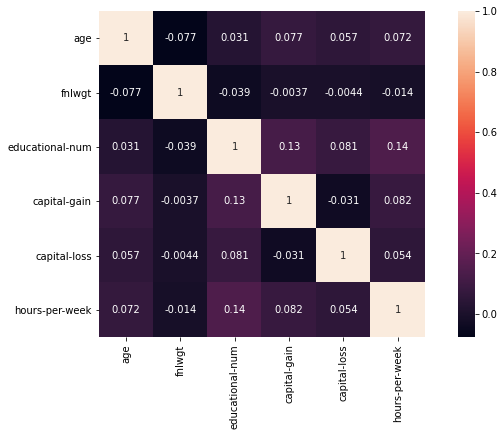

In [27]:
fig= plt.figure(figsize=(12,6))
sns.heatmap(adult[list(num_col.index)].corr(),annot=True,square=True)
plt.show()

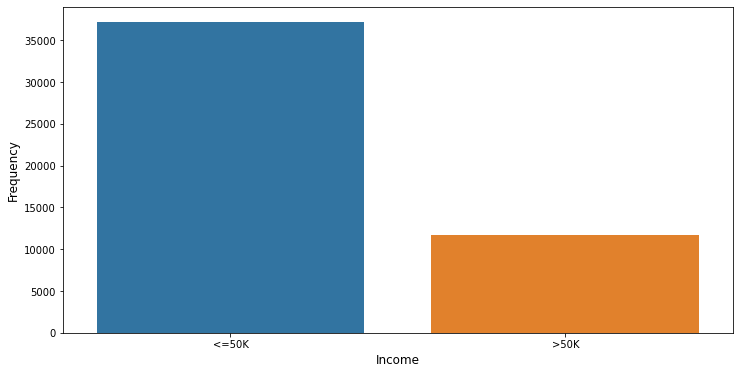

In [28]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42aeaf6b90>,
      dtype=object)

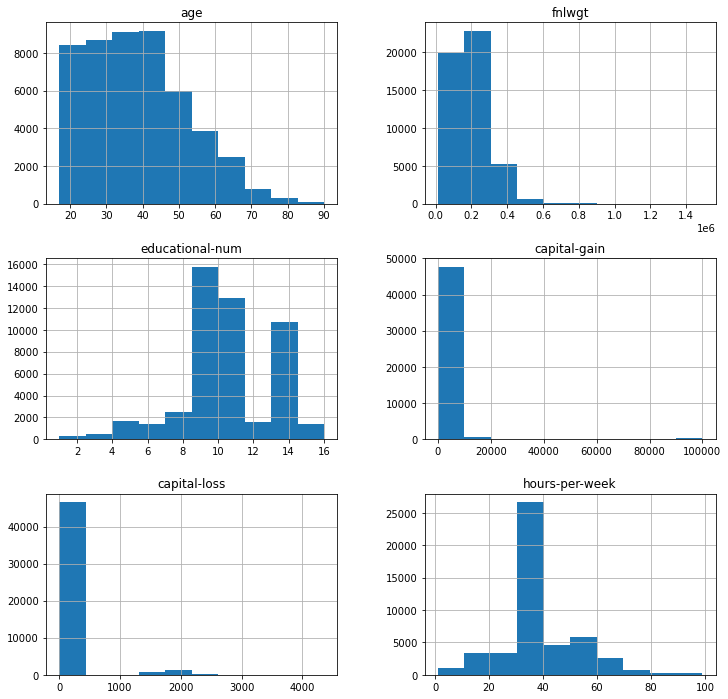

In [29]:
adult[list(num_col.index)].hist(figsize = (12,12))

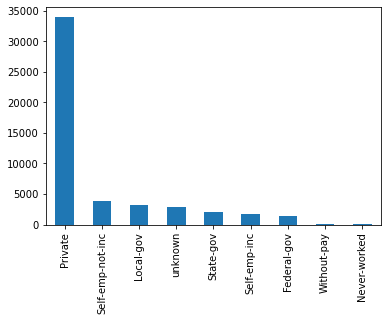

In [30]:
adult['workclass'].value_counts().plot(kind='bar')# univariate analysis


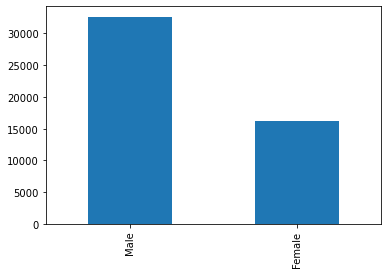

In [31]:
adult['gender'].value_counts().plot(kind='bar')# univariate analysis


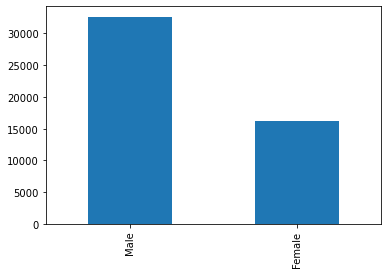

In [32]:
adult['gender'].value_counts().plot(kind='bar')

In [ ]:
# Education VS Income

In [33]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in adult[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

Text(0, 0.5, 'Proportion of population')

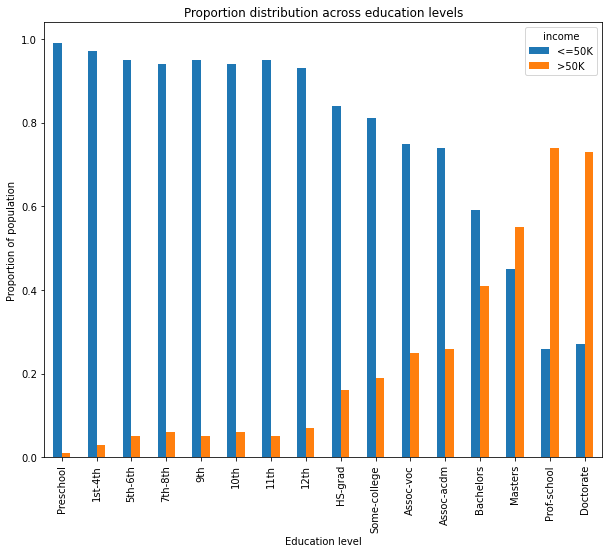

In [34]:
#bivariate analysis
education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')


In [ ]:
# Gender VS Income

In [35]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in adult[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

Text(0, 0.5, 'Proportion of population')

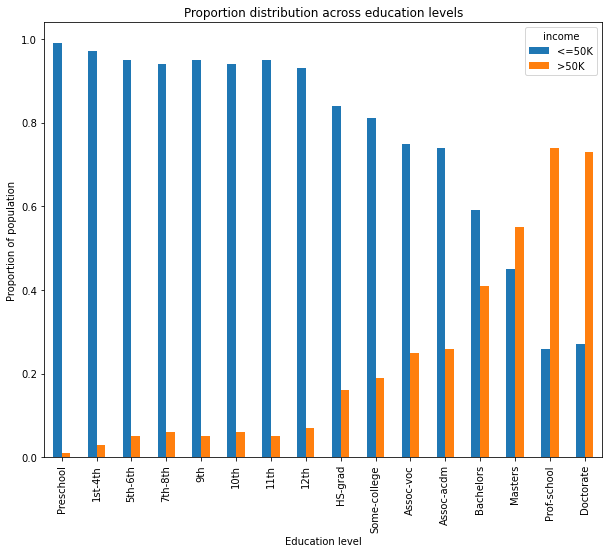

In [36]:
education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

Text(17.200000000000003, 0.5, 'Proportion of population')

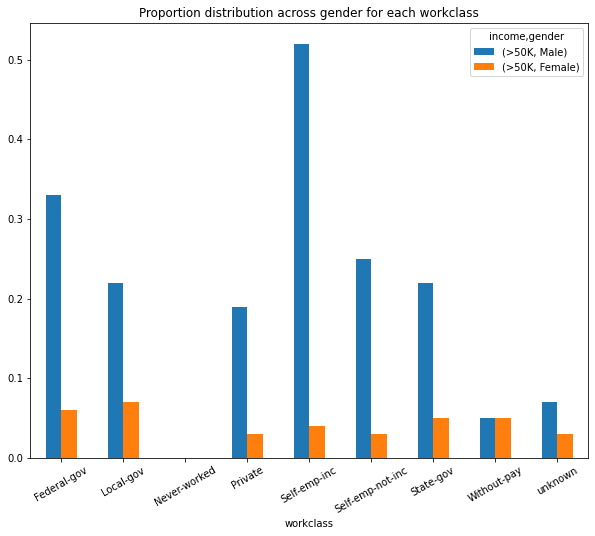

In [37]:
#multivariate analysis
gender_workclass = round(pd.crosstab(adult.workclass, [adult.income, adult.gender]).div(pd.crosstab(adult.workclass, [adult.income, adult.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

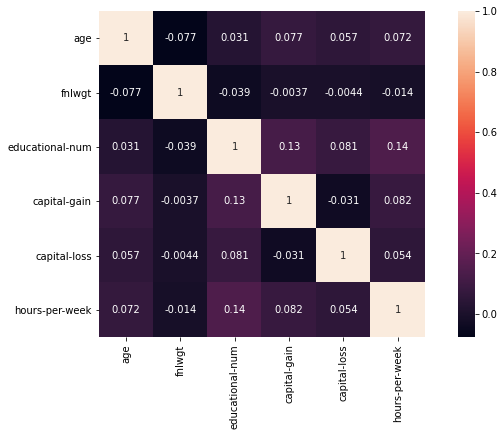

In [38]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(adult[list(num_col.index)].corr(),annot = True,square = True)
plt.show()

In [39]:
# To convert categorical data in to numerical  data
from sklearn.preprocessing import LabelEncoder 
number = LabelEncoder()
adult["workclass"]=number.fit_transform(adult["workclass"])
adult["education"]=number.fit_transform(adult["education"])
adult["marital-status"]=number.fit_transform(adult["marital-status"])
adult["occupation"]=number.fit_transform(adult["occupation"])
adult["relationship"]=number.fit_transform(adult["relationship"])
adult["race"]=number.fit_transform(adult["race"])
adult["gender"]=number.fit_transform(adult["gender"])
adult["native-country"]=number.fit_transform(adult["native-country"])
adult["income"]=number.fit_transform(adult["income"])
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [40]:
#feature engineering
del_cols = ['relationship','fnlwgt','educational-num']
adult.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult.shape[1]}")

Number of columns after deleting: 12


In [41]:
adult.head()

,age,workclass,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,1,4,6,2,1,0,0,40,38,0
1,38,3,11,2,4,4,1,0,0,50,38,0
2,28,1,7,2,10,4,1,0,0,40,38,1
3,44,3,15,2,6,2,1,7688,0,40,38,1
4,18,8,15,4,14,4,0,0,0,30,38,0


In [42]:
hrs_per_week = adult[adult['hours-per-week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])

Number of people working for 99 hours per week: 137


In [43]:
# feature selection
print("Number of observation before removing:",adult.shape)
index_age = adult[adult['age'] == 90].index
adult.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",adult.shape)

Number of observation before removing: (48842, 12)
Number of observation after removing: (48787, 12)


In [44]:
X=adult.iloc[:,:-1] #independent variables
X

,age,workclass,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,1,4,6,2,1,0,0,40,38
1,38,3,11,2,4,4,1,0,0,50,38
2,28,1,7,2,10,4,1,0,0,40,38
3,44,3,15,2,6,2,1,7688,0,40,38
4,18,8,15,4,14,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,7,2,12,4,0,0,0,38,38
48838,40,3,11,2,6,4,1,0,0,40,38
48839,58,3,11,6,0,4,0,0,0,40,38
48840,22,3,11,4,0,4,1,0,0,20,38


In [45]:
y=adult.iloc[:,-1] # target variable
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48787, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [47]:
# split data randomly into 70% training and 30% test
X_train,x_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)


In [48]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()

In [49]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest']

In [50]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest'}
          

In [53]:
# train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,x_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)    


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 79.8934%
Null Accuracy: 75.9719%
Confusion Matrix
[[10688   432]
 [ 2511  1006]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 79.8934%
Recall Score: 28.6039%
Specificity Score: 96.1151%
False Positive Rate: 3.8849%
Precision Score: 69.9583%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     11120
           1       0.70      0.29      0.41      3517

    accuracy                           0.80     14637
   macro avg       0.75      0.62      0.64     14637
weighted avg       0.78      0.80      0.77     14637

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for Decisio

In [52]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',ascending = False)

,Accuracy Scores
RandomForest,0.852565
KNN,0.836510
DecisionTree,0.822436
SVC,0.806176
LogisticRegression,0.798934
